In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import os

In [2]:
dflabel=pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), "data/machine_learning_challenge_labeled_data.csv.gz"))
dforders=pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), "data/machine_learning_challenge_order_data.csv.gz"))

In [10]:
dflabel.shape

(245455, 2)

In [11]:
dforders.shape

(786600, 13)

In [5]:
dflabel.head()

,customer_id,is_returning_customer
0,000097eabfd9,0
1,0000e2c6d9be,0
2,000133bb597f,1
3,00018269939b,0
4,0001a00468a6,0


In [6]:
Total = dflabel['is_returning_customer'].sum()
print (Total)

55507


In [7]:
dflabel.describe()

,is_returning_customer
count,245455.000000
mean,0.226139
std,0.418331
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
dforders.head()

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
0,000097eabfd9,2015-06-20,19,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356
1,0000e2c6d9be,2016-01-29,20,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356
2,000133bb597f,2017-02-26,19,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324
3,00018269939b,2017-02-05,17,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356
4,0001a00468a6,2015-08-04,19,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356


In [9]:
dforders.describe()

,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
count,786600.000000,761833.000000,786600.000000,786600.000000,786600.00000,786600.000000,7.866000e+05,786600.000000,786600.000000,786600.000000,786600.000000
mean,17.588796,9.436810,0.031486,0.091489,0.18118,10.183271,1.628641e+08,47179.750497,1668.509077,29868.529382,4253.246112
std,3.357192,17.772322,0.174628,0.479558,0.36971,5.618121,8.783082e+07,25904.630565,87.192665,1160.893265,572.855666
min,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,7.349800e+04,230.000000,1491.000000,525.000000,212.000000
25%,16.000000,1.000000,0.000000,0.000000,0.00000,6.648120,8.602350e+07,24799.000000,1619.000000,29463.000000,4228.000000
50%,18.000000,3.000000,0.000000,0.000000,0.00000,9.027000,1.696135e+08,46467.000000,1619.000000,29815.000000,4324.000000
75%,20.000000,10.000000,0.000000,0.000000,0.00000,12.213000,2.284335e+08,67886.000000,1779.000000,30231.000000,4356.000000
max,23.000000,369.000000,1.000000,93.398900,9.86000,1131.030000,3.404535e+08,100205.000000,1811.000000,30423.000000,21124.000000


In [13]:
design_report = pp.ProfileReport(dforders)
design_report.to_file(output_file=os.path.join(os.path.dirname(os.getcwd()), "output/raw_data_report.html"))

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 122.48it/s]


In [194]:
unicust=pd.DataFrame(dforders['customer_id'].unique())
unicust.columns = ['customer_id']
unicust.head()

,customer_id
0,000097eabfd9
1,0000e2c6d9be
2,000133bb597f
3,00018269939b
4,0001a00468a6


In [195]:
type(unicust)

pandas.core.frame.DataFrame

In [3]:
dforders.is_failed.value_counts()

0    761833
1     24767
Name: is_failed, dtype: int64

In [196]:
dfcheck = pd.merge(dflabel, unicust, how="inner", on=["customer_id"])

In [197]:
dfcheck .shape

(245455, 2)

In [57]:
dfsummary=dforders.groupby('customer_id',as_index=False).count()[['customer_id','restaurant_id','city_id','payment_id','platform_id','transmission_id']]                                                                          
                                                                                

In [123]:
dforders.shape

(786600, 13)

In [10]:
dforders.isnull().sum()

customer_id                0
order_date                 0
order_hour                 0
customer_order_rank    24767
is_failed                  0
voucher_amount             0
delivery_fee               0
amount_paid                0
restaurant_id              0
city_id                    0
payment_id                 0
platform_id                0
transmission_id            0
dtype: int64

In [14]:
null_data = dforders[dforders.isnull().any(axis=1)]
null_data.shape

(24767, 13)

In [15]:
null_datareport = pp.ProfileReport(null_data)
null_datareport.to_file(output_file=os.path.join(os.path.dirname(os.getcwd()), "output/null_data_report.html"))

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 120.15it/s]


In [16]:
duplicateDFRow = dforders[dforders.duplicated()]
duplicateDFRow.describe()


,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
count,546.000000,0.0,546.0,546.000000,546.000000,546.000000,5.460000e+02,546.000000,546.000000,546.000000,546.000000
mean,17.216117,NaN,1.0,0.109622,0.208297,10.753236,1.729614e+08,46507.635531,1646.018315,29870.091575,1161.391941
std,4.303721,NaN,0.0,0.571212,0.433870,15.478844,9.125461e+07,26134.637295,134.021783,336.618559,1735.867106
min,0.000000,NaN,1.0,0.000000,0.000000,0.000000,2.334980e+05,230.000000,1491.000000,29463.000000,212.000000
25%,15.000000,NaN,1.0,0.000000,0.000000,5.925960,8.519600e+07,21710.250000,1491.000000,29463.000000,212.000000
50%,18.000000,NaN,1.0,0.000000,0.000000,8.349975,1.831735e+08,46779.500000,1619.000000,29815.000000,212.000000
75%,20.000000,NaN,1.0,0.000000,0.000000,11.682000,2.527535e+08,65279.750000,1779.000000,30231.000000,212.000000
max,23.000000,NaN,1.0,5.145000,2.218500,237.516300,3.326735e+08,99654.000000,1811.000000,30391.000000,4996.000000


In [17]:
duplicate_datareport = pp.ProfileReport(duplicateDFRow)
duplicate_datareport.to_file(output_file=os.path.join(os.path.dirname(os.getcwd()), "output/duplicate_datareport.html"))

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 109.99it/s]


## ETL


In [3]:
dforders.drop_duplicates(keep=False,inplace=True)
dforders.shape

(785571, 13)

In [4]:
dforders['Isnullrank']=np.where(dforders.customer_order_rank.isnull(),1,0)
dforders['Isnonzerovoucher']=np.where(dforders.voucher_amount>0,1,0)

In [5]:
##time frame columns
import calendar

dforders.order_date = pd.to_datetime(dforders.order_date)
dforders['year'] = dforders['order_date'].dt.year
dforders['month'] = dforders.order_date.apply(lambda x: x.strftime('%Y-%m'))
dforders['week_number'] = dforders.order_date.dt.week
dforders['week_day'] = dforders.order_date.dt.day_name()
#dforders['month'] = dforders.month.apply(lambda x: calendar.month_abbr[x])

In [6]:
def day_time(x):
    if x['order_hour'] < 8:
        return 'night'
    elif (x['order_hour'] >=8) & (x['order_hour'] <16):
        return 'day'
    elif x['order_hour'] >= 16:
        return 'evening'
dforders['hour_class'] = dforders.apply(day_time, axis=1)

In [7]:
dforders.hour_class.unique()

array(['evening', 'day', 'night'], dtype=object)

In [8]:
dff = dforders.merge(dflabel, on='customer_id', how='inner')
pd.crosstab(dff.is_returning_customer, dff.is_failed)


is_failed,0,1
is_returning_customer,,
0,366577,10748
1,395256,12990


In [9]:
dff=pd.get_dummies(dforders, columns=['hour_class'])


In [10]:
dff.columns

Index(['customer_id', 'order_date', 'order_hour', 'customer_order_rank',
       'is_failed', 'voucher_amount', 'delivery_fee', 'amount_paid',
       'restaurant_id', 'city_id', 'payment_id', 'platform_id',
       'transmission_id', 'Isnullrank', 'Isnonzerovoucher', 'year', 'month',
       'week_number', 'week_day', 'hour_class_day', 'hour_class_evening',
       'hour_class_night'],
      dtype='object')

In [11]:
df1=dff.groupby('customer_id',as_index=False).agg(['min','max','median'])[['customer_order_rank','voucher_amount','amount_paid','delivery_fee']]

In [12]:
df2=dff.groupby(['customer_id']).agg({'order_date': [np.min,np.max]})


In [13]:
df3=dff.groupby('customer_id',as_index=False).agg(['sum'])[['customer_order_rank','Isnullrank','Isnonzerovoucher','voucher_amount','is_failed','amount_paid','delivery_fee','hour_class_day','hour_class_evening','hour_class_night']]

In [14]:
df4=dff.groupby('customer_id',as_index=False).agg(['nunique'])[['restaurant_id','city_id','payment_id','platform_id','transmission_id','year','week_day','month','order_date']]                           

In [15]:
dff['Is2017']=np.where(dff['year']==2017,1,0)
dff['Is2016']=np.where(dff['year']==2016,1,0)
dff['Is2015']=np.where(dff['year']==2015,1,0)
df5=dff.groupby(['customer_id']).agg(['sum'])[['Is2017','Is2016','Is2015']]

In [16]:
##df5=pd.DataFrame(dforders[['customer_id']].value_counts())                                                        
df6=dff.groupby(['customer_id']).size().reset_index() 
df6.columns=['customer_id','totaltranscations']

In [17]:
dforderssummary=df1.merge(df2,on='customer_id').merge(df3,on='customer_id').merge(df4,on='customer_id').merge(df5,on='customer_id').merge(df6,on='customer_id').merge(dflabel,on='customer_id')
dforderssummary.head()

,customer_id,"(customer_order_rank, min)","(customer_order_rank, max)","(customer_order_rank, median)","(voucher_amount, min)","(voucher_amount, max)","(voucher_amount, median)","(amount_paid, min)","(amount_paid, max)","(amount_paid, median)",...,"(transmission_id, nunique)","(year, nunique)","(week_day, nunique)","(month, nunique)","(order_date, nunique)","(Is2017, sum)","(Is2016, sum)","(Is2015, sum)",totaltranscations,is_returning_customer
0,000097eabfd9,1.0,1.0,1.0,0.0,0.0,0.0,11.46960,11.46960,11.46960,...,1,1,1,1,1,0,0,1,1,0
1,0000e2c6d9be,1.0,1.0,1.0,0.0,0.0,0.0,9.55800,9.55800,9.55800,...,1,1,1,1,1,0,1,0,1,0
2,000133bb597f,1.0,1.0,1.0,0.0,0.0,0.0,5.93658,5.93658,5.93658,...,1,1,1,1,1,1,0,0,1,1
3,00018269939b,1.0,1.0,1.0,0.0,0.0,0.0,9.82350,9.82350,9.82350,...,1,1,1,1,1,1,0,0,1,0
4,0001a00468a6,1.0,1.0,1.0,0.0,0.0,0.0,5.15070,5.15070,5.15070,...,1,1,1,1,1,0,0,1,1,0


In [18]:
dforderssummary.columns

Index([                    'customer_id',    ('customer_order_rank', 'min'),
          ('customer_order_rank', 'max'), ('customer_order_rank', 'median'),
               ('voucher_amount', 'min'),         ('voucher_amount', 'max'),
            ('voucher_amount', 'median'),            ('amount_paid', 'min'),
                  ('amount_paid', 'max'),         ('amount_paid', 'median'),
                 ('delivery_fee', 'min'),           ('delivery_fee', 'max'),
              ('delivery_fee', 'median'),            ('order_date', 'amin'),
                  ('order_date', 'amax'),    ('customer_order_rank', 'sum'),
                   ('Isnullrank', 'sum'),       ('Isnonzerovoucher', 'sum'),
               ('voucher_amount', 'sum'),              ('is_failed', 'sum'),
                  ('amount_paid', 'sum'),           ('delivery_fee', 'sum'),
               ('hour_class_day', 'sum'),     ('hour_class_evening', 'sum'),
             ('hour_class_night', 'sum'),      ('restaurant_id', 'nunique'),

In [19]:
dforderssummary.dtypes

customer_id                              object
(customer_order_rank, min)              float64
(customer_order_rank, max)              float64
(customer_order_rank, median)           float64
(voucher_amount, min)                   float64
(voucher_amount, max)                   float64
(voucher_amount, median)                float64
(amount_paid, min)                      float64
(amount_paid, max)                      float64
(amount_paid, median)                   float64
(delivery_fee, min)                     float64
(delivery_fee, max)                     float64
(delivery_fee, median)                  float64
(order_date, amin)               datetime64[ns]
(order_date, amax)               datetime64[ns]
(customer_order_rank, sum)              float64
(Isnullrank, sum)                         int64
(Isnonzerovoucher, sum)                   int64
(voucher_amount, sum)                   float64
(is_failed, sum)                          int64
(amount_paid, sum)                      

In [20]:
cols = dforderssummary.iloc[:,1:-2].columns
newcols = []
for x in cols: 
    newcols.append('_'.join(list(x)))
newcols
newdf = dforderssummary.copy(True)
for i,j in zip(dforderssummary.iloc[:, 1:-2], newcols):
    newdf.rename(columns={i : j}, inplace=True)
newdf.columns

Index(['customer_id', 'customer_order_rank_min', 'customer_order_rank_max',
       'customer_order_rank_median', 'voucher_amount_min',
       'voucher_amount_max', 'voucher_amount_median', 'amount_paid_min',
       'amount_paid_max', 'amount_paid_median', 'delivery_fee_min',
       'delivery_fee_max', 'delivery_fee_median', 'order_date_amin',
       'order_date_amax', 'customer_order_rank_sum', 'Isnullrank_sum',
       'Isnonzerovoucher_sum', 'voucher_amount_sum', 'is_failed_sum',
       'amount_paid_sum', 'delivery_fee_sum', 'hour_class_day_sum',
       'hour_class_evening_sum', 'hour_class_night_sum',
       'restaurant_id_nunique', 'city_id_nunique', 'payment_id_nunique',
       'platform_id_nunique', 'transmission_id_nunique', 'year_nunique',
       'week_day_nunique', 'month_nunique', 'order_date_nunique', 'Is2017_sum',
       'Is2016_sum', 'Is2015_sum', 'totaltranscations',
       'is_returning_customer'],
      dtype='object')

In [21]:
newdf.head()

,customer_id,customer_order_rank_min,customer_order_rank_max,customer_order_rank_median,voucher_amount_min,voucher_amount_max,voucher_amount_median,amount_paid_min,amount_paid_max,amount_paid_median,...,transmission_id_nunique,year_nunique,week_day_nunique,month_nunique,order_date_nunique,Is2017_sum,Is2016_sum,Is2015_sum,totaltranscations,is_returning_customer
0,000097eabfd9,1.0,1.0,1.0,0.0,0.0,0.0,11.46960,11.46960,11.46960,...,1,1,1,1,1,0,0,1,1,0
1,0000e2c6d9be,1.0,1.0,1.0,0.0,0.0,0.0,9.55800,9.55800,9.55800,...,1,1,1,1,1,0,1,0,1,0
2,000133bb597f,1.0,1.0,1.0,0.0,0.0,0.0,5.93658,5.93658,5.93658,...,1,1,1,1,1,1,0,0,1,1
3,00018269939b,1.0,1.0,1.0,0.0,0.0,0.0,9.82350,9.82350,9.82350,...,1,1,1,1,1,1,0,0,1,0
4,0001a00468a6,1.0,1.0,1.0,0.0,0.0,0.0,5.15070,5.15070,5.15070,...,1,1,1,1,1,0,0,1,1,0


In [22]:
newdf['daydiff']=(newdf['order_date_amax']-newdf['order_date_amin'])/np.timedelta64(1, 'D')
newdf['daydiff']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
245449     0.0
245450    61.0
245451    29.0
245452     0.0
245453     0.0
Name: daydiff, Length: 245454, dtype: float64

In [23]:
newdf_datareport = pp.ProfileReport(newdf)
newdf_datareport.to_file(output_file=os.path.join(os.path.dirname(os.getcwd()), "output/etl_data_report.html"))

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]


In [ ]:
newdf.head()

In [ ]:
newdf['samedaytransaction']=np.where((newdf.order_date_nunique == 1) & (newdf.totaltranscations>1),1,0)
newdf['moretrans']=np.where(newdf.order_date_nunique < newdf.totaltranscations ,1,0)

In [ ]:
newdf[newdf.samedaytransaction == 1]

In [ ]:
newdf[newdf.moretrans == 1]

In [249]:
min(dforders['order_date'])

Timestamp('2012-05-17 00:00:00')

In [221]:
max(dforders['order_date'])

Timestamp('2017-02-27 00:00:00')

In [222]:

dfactive=newdf[newdf.is_returning_customer == 1]

In [223]:
dfactive.shape

(55506, 36)

In [224]:
dfactive.columns

Index(['customer_id', 'customer_order_rank_min', 'customer_order_rank_max',
       'customer_order_rank_median', 'voucher_amount_min',
       'voucher_amount_max', 'voucher_amount_median', 'amount_paid_min',
       'amount_paid_max', 'amount_paid_median', 'delivery_fee_min',
       'delivery_fee_max', 'delivery_fee_median', 'order_date_amin',
       'order_date_amax', 'customer_order_rank_sum', 'Isnullrank_sum',
       'Isnonzerovoucher_sum', 'voucher_amount_sum', 'amount_paid_sum',
       'delivery_fee_sum', 'restaurant_id_nunique', 'city_id_nunique',
       'payment_id_nunique', 'platform_id_nunique', 'transmission_id_nunique',
       'year_nunique', 'week_day_nunique', 'month_nunique',
       'order_date_nunique', 'Is2017_sum', 'totaltranscations',
       'is_returning_customer', 'daydiff', 'samedaytransaction', 'moretrans'],
      dtype='object')

In [225]:
max(dfactive['order_date_amax'])

Timestamp('2017-02-27 00:00:00')

In [226]:
min(dfactive['order_date_amax'])

Timestamp('2013-06-09 00:00:00')

In [227]:
max(dfactive['order_date_amin'])

Timestamp('2017-02-27 00:00:00')

In [228]:
min(dfactive['order_date_amin'])

Timestamp('2012-08-10 00:00:00')

(array([  1.,   0.,   1.,   0.,  49., 136., 136., 136., 136., 136.]),
 array([735028. , 735163.9, 735299.8, 735435.7, 735571.6, 735707.5,
        735843.4, 735979.3, 736115.2, 736251.1, 736387. ]),
 <a list of 10 Patch objects>)

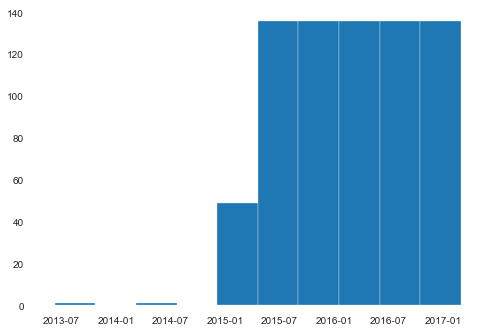

In [229]:
import matplotlib.pyplot as plt


plt.hist(dfactive.order_date_amax.unique())


In [156]:
dfactive.order_date_amax.nunique()

731

In [157]:
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates



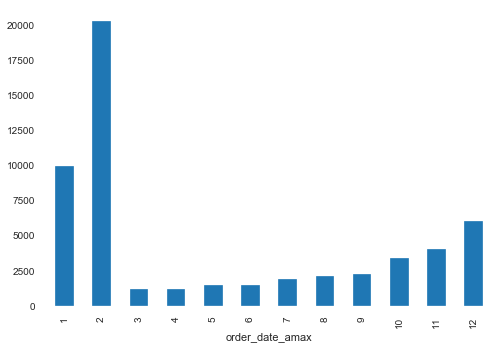

In [158]:
dfactive["order_date_amax"].groupby(dfactive["order_date_amax"].dt.month).count().plot(kind="bar")

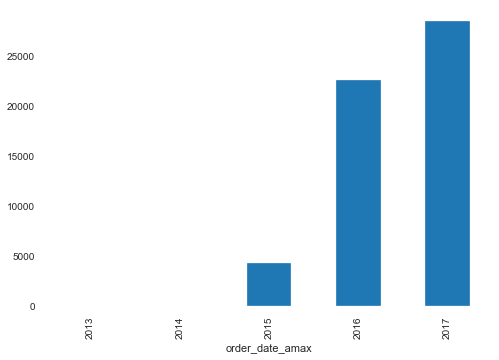

In [250]:
dfactive["order_date_amax"].groupby(dfactive["order_date_amax"].dt.year).count().plot(kind="bar")

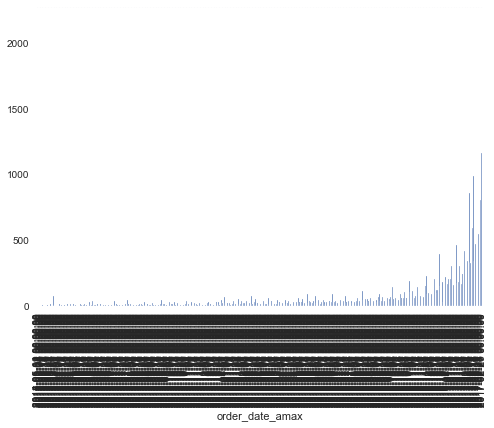

In [64]:
dfactive["order_date_amax"].groupby(dfactive["order_date_amax"]).count().plot(kind="bar")

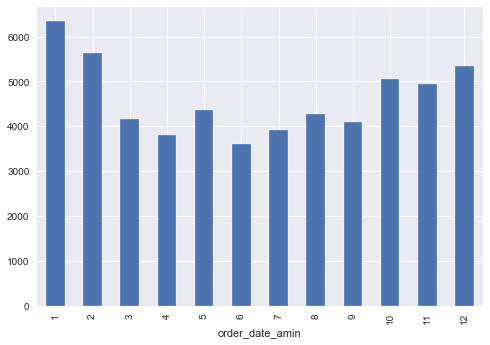

In [65]:
dfactive["order_date_amin"].groupby(dfactive["order_date_amin"].dt.month).count().plot(kind="bar")

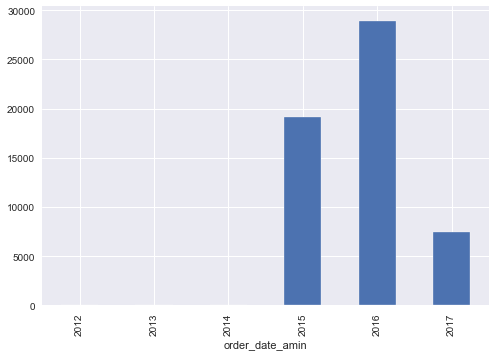

In [66]:
dfactive["order_date_amin"].groupby(dfactive["order_date_amin"].dt.year).count().plot(kind="bar")

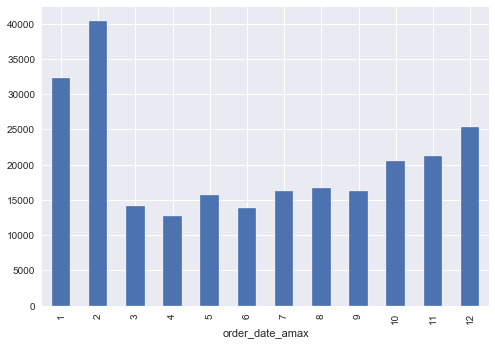

In [67]:
newdf["order_date_amax"].groupby(newdf["order_date_amax"].dt.month).count().plot(kind="bar")

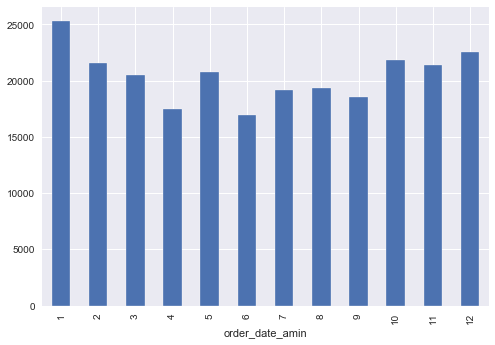

In [68]:
newdf["order_date_amin"].groupby(newdf["order_date_amin"].dt.month).count().plot(kind="bar")

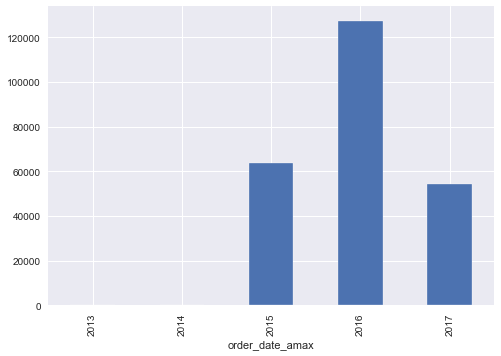

In [69]:
newdf["order_date_amax"].groupby(newdf["order_date_amax"].dt.year).count().plot(kind="bar")

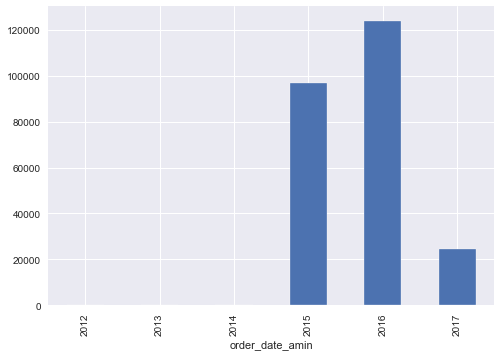

In [70]:
newdf["order_date_amin"].groupby(newdf["order_date_amin"].dt.year).count().plot(kind="bar")

In [38]:
dforders['yearmonth']=dforders.year.astype('str')+'-' +dforders.month.astype('str')
#dforders['yearmonth']=pd.concat[dforders['year','month']]

In [98]:
dforders.sort_values(by=['year', 'month'])

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id,Isnullrank,Isnonzerovoucher,year,month,week_number,week_day,yearmonth
725423,eb59ccd81693,2012-08-10,17,1.0,0,0.0,0.000,4.19490,2413498,20326,1619,30231,4324,0,0,2012,Aug,32,Friday,Aug-2012
748165,f326f5034809,2012-12-08,16,1.0,0,0.0,0.000,9.02700,89253498,36268,1619,30199,4324,0,0,2012,Dec,49,Saturday,Dec-2012
536621,ad8f458395ae,2012-05-17,19,1.0,0,0.0,0.493,18.16020,3783498,80562,1619,525,21124,0,0,2012,May,20,Thursday,May-2012
747902,f308e2522927,2012-09-27,15,1.0,0,0.0,0.000,15.39900,49563498,33561,1619,525,4324,0,0,2012,Sep,39,Thursday,Sep-2012
436221,8c16745dfd95,2013-08-25,19,2.0,0,0.0,0.000,18.85050,120623498,79543,1619,30231,4356,0,0,2013,Aug,34,Sunday,Aug-2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786518,fff44c1df16e,2017-01-11,17,5.0,0,0.0,0.000,5.84100,36363498,9342,1779,29815,4356,0,0,2017,Jan,2,Wednesday,Jan-2017
786542,fff7dff60e88,2017-01-09,16,5.0,0,0.0,0.000,6.10650,34873498,76362,1619,30231,4260,0,0,2017,Jan,2,Monday,Jan-2017
786543,fff7dff60e88,2017-01-25,19,6.0,0,0.0,0.000,10.30140,311543498,76362,1779,30231,4324,0,0,2017,Jan,4,Wednesday,Jan-2017
786561,fff88124accd,2017-01-22,13,10.0,0,0.0,0.000,8.17740,329733498,10346,1811,29815,4996,0,0,2017,Jan,3,Sunday,Jan-2017


In [101]:
yearmonth = dforders.yearmonth.unique()
dforders['yearmonth'] = pd.Categorical(dforders['yearmonth'], categories=yearmonth, ordered=True)

In [113]:
dforders1 = dforders.copy(True)
dforders1.set_index(dforders1['order_date'], inplace=True)
dforders1.index = dforders1.index.strftime('%B-%Y')

In [173]:

yearmonth = dforders.yearmonth.unique()


['2015-6', '2016-1', '2017-2', '2017-2', '2015-8', ..., '2016-9', '2016-8', '2016-9', '2016-4', '2015-5']
Length: 785571
Categories (49, object): ['2015-6' < '2016-1' < '2017-2' < '2015-8' ... '2014-11' < '2012-8' < '2012-9' < '2012-12']

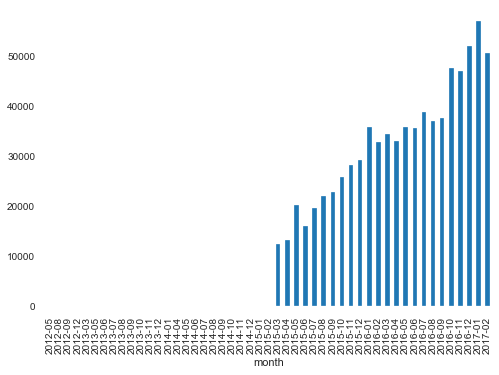

In [160]:
dforders["month"].groupby(dforders["month"]).count().plot(kind="bar")

In [162]:
newdf.shape

(245454, 35)

In [163]:
newdf.isnull().sum()

customer_id                     0
customer_order_rank_min       517
customer_order_rank_max       517
customer_order_rank_median    517
voucher_amount_min              0
voucher_amount_max              0
voucher_amount_median           0
amount_paid_min                 0
amount_paid_max                 0
amount_paid_median              0
delivery_fee_min                0
delivery_fee_max                0
delivery_fee_median             0
order_date_amin                 0
order_date_amax                 0
Isnullrank_sum                  0
Isnonzerovoucher_sum            0
voucher_amount_sum              0
amount_paid_sum                 0
delivery_fee_sum                0
restaurant_id_nunique           0
city_id_nunique                 0
payment_id_nunique              0
platform_id_nunique             0
transmission_id_nunique         0
year_nunique                    0
week_day_nunique                0
month_nunique                   0
order_date_nunique              0
Is2017_sum    

In [164]:
newdf[newdf['Isnullrank']==1]


KeyError: 'Isnullrank'

In [167]:
newdf[newdf.Isnullrank_sum >0]

,customer_id,customer_order_rank_min,customer_order_rank_max,customer_order_rank_median,voucher_amount_min,voucher_amount_max,voucher_amount_median,amount_paid_min,amount_paid_max,amount_paid_median,...,year_nunique,week_day_nunique,month_nunique,order_date_nunique,Is2017_sum,totaltranscations,is_returning_customer,daydiff,samedaytransaction,moretrans
38,000afe75dc19,1.0,17.0,9.0,0.0,2.87434,1.7150,3.55770,13.33872,7.168500,...,3,7,12,18,1,18,1,695.0,0,0
59,0011683ab734,1.0,1.0,1.0,0.0,1.02900,0.5145,8.76150,10.35450,9.558000,...,1,2,1,2,2,2,1,2.0,0,0
62,0011f9b2693b,1.0,4.0,2.5,0.0,0.00000,0.0000,8.16678,27.73413,13.338720,...,1,5,2,6,0,6,1,60.0,0,0
64,0012b1474694,1.0,4.0,2.5,0.0,0.00000,0.0000,7.91190,16.56720,10.035900,...,2,2,3,4,4,5,1,176.0,0,1
69,00144f5638a1,1.0,1.0,1.0,0.0,0.00000,0.0000,5.84100,5.94189,5.891445,...,1,2,2,2,0,2,0,86.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245341,ffdaf5ae1702,1.0,3.0,2.0,0.0,0.00000,0.0000,3.92940,5.04450,3.929400,...,1,4,2,4,0,4,1,48.0,0,0
245357,ffe10cf79310,1.0,22.0,11.5,0.0,0.00000,0.0000,3.98250,10.03590,4.258620,...,3,6,11,22,4,23,1,452.0,0,1
245361,ffe2a6942fd2,1.0,33.0,17.0,0.0,2.05800,0.0000,4.51350,16.62030,7.965000,...,2,6,11,38,0,41,1,445.0,0,1
245376,ffe7577807b8,1.0,4.0,2.5,0.0,0.00000,0.0000,7.69950,10.35450,9.027000,...,2,4,4,4,1,5,1,103.0,0,1


In [174]:
newdf[(newdf.customer_order_rank_min.isnull()) & (newdf.totaltranscations>1)]

,customer_id,customer_order_rank_min,customer_order_rank_max,customer_order_rank_median,voucher_amount_min,voucher_amount_max,voucher_amount_median,amount_paid_min,amount_paid_max,amount_paid_median,...,year_nunique,week_day_nunique,month_nunique,order_date_nunique,Is2017_sum,totaltranscations,is_returning_customer,daydiff,samedaytransaction,moretrans
2439,0294653aa232,NaN,NaN,NaN,0.00000,0.00000,0.000000,6.37200,6.37200,6.372000,...,1,2,1,3,0,4,1,7.0,0,1
2642,02d2cf8c7dbf,NaN,NaN,NaN,0.00000,0.00000,0.000000,4.51350,4.61970,4.566600,...,1,2,2,2,0,2,1,205.0,0,0
20521,154ba73eb730,NaN,NaN,NaN,0.00000,0.00000,0.000000,6.95610,8.28360,7.619850,...,1,1,1,1,0,2,1,0.0,1,1
20641,1566ab3cf3b1,NaN,NaN,NaN,0.00000,0.00000,0.000000,4.61970,8.44290,6.212700,...,1,3,2,3,0,3,1,99.0,0,0
23967,18d7eff45d5f,NaN,NaN,NaN,0.00000,0.00000,0.000000,11.41650,14.39010,12.903300,...,2,1,2,2,1,2,1,644.0,0,0
24265,19274b3de71f,NaN,NaN,NaN,0.00000,0.00000,0.000000,8.49600,10.62000,8.496000,...,1,2,1,2,0,3,1,1.0,0,1
30559,1fac0228a027,NaN,NaN,NaN,0.00000,0.00000,0.000000,8.33670,8.33670,8.336700,...,1,1,1,1,0,2,1,0.0,1,1
32200,21563d869499,NaN,NaN,NaN,0.00000,0.00000,0.000000,11.15100,11.36340,11.257200,...,1,2,1,2,0,2,1,4.0,0,0
34804,2415100b415f,NaN,NaN,NaN,0.00000,0.00000,0.000000,8.79867,10.08900,9.443835,...,1,2,2,2,0,2,1,102.0,0,0
36078,25702c8870f9,NaN,NaN,NaN,0.00000,0.00000,0.000000,7.69950,8.12430,7.911900,...,1,1,1,2,0,2,1,14.0,0,0


In [175]:
dforders[dforders.customer_id=='da2c86a726ad']

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id,Isnullrank,Isnonzerovoucher,year,month,week_number,week_day,Is2017
672244,da2c86a726ad,2017-01-12,17,NaN,1,0.000,0.0000,10.35450,81433498,40441,1619,29463,4324,1,0,2017,2017-01,2,Thursday,1
672245,da2c86a726ad,2017-01-12,17,NaN,1,0.000,0.0000,10.88550,81433498,40441,1619,29463,4356,1,0,2017,2017-01,2,Thursday,1
672246,da2c86a726ad,2017-01-20,15,NaN,1,0.000,0.9860,9.50490,328333498,41583,1619,29463,4228,1,0,2017,2017-01,3,Friday,1
672247,da2c86a726ad,2017-01-23,0,NaN,1,0.000,0.0000,11.20410,139603498,10346,1619,29463,4228,1,0,2017,2017-01,4,Monday,1
672248,da2c86a726ad,2017-01-25,22,NaN,1,0.000,0.0000,12.18645,36133498,85354,1619,29463,4324,1,0,2017,2017-01,4,Wednesday,1
672249,da2c86a726ad,2017-01-28,21,NaN,1,0.000,0.0000,6.79680,306853498,87831,1619,29463,4228,1,0,2017,2017-01,4,Saturday,1
672250,da2c86a726ad,2017-01-28,21,NaN,1,0.000,0.0000,8.92080,306853498,87831,1619,29463,4228,1,0,2017,2017-01,4,Saturday,1
672251,da2c86a726ad,2017-02-03,16,NaN,1,0.000,0.0000,7.46055,215583498,10346,1619,29463,4324,1,0,2017,2017-02,5,Friday,1
672252,da2c86a726ad,2017-02-04,16,NaN,1,0.000,0.0000,15.39900,307733498,4334,1619,29463,4228,1,0,2017,2017-02,5,Saturday,1
672253,da2c86a726ad,2017-02-05,14,NaN,1,0.000,0.0000,16.46100,28733498,50898,1619,29463,4324,1,0,2017,2017-02,5,Sunday,1


In [179]:
newdf[(newdf.customer_order_rank_min.isnull()) & (newdf.is_returning_customer>0)]

,customer_id,customer_order_rank_min,customer_order_rank_max,customer_order_rank_median,voucher_amount_min,voucher_amount_max,voucher_amount_median,amount_paid_min,amount_paid_max,amount_paid_median,...,year_nunique,week_day_nunique,month_nunique,order_date_nunique,Is2017_sum,totaltranscations,is_returning_customer,daydiff,samedaytransaction,moretrans
906,00f2b54a4bfb,NaN,NaN,NaN,0.0,0.0,0.0,10.35450,10.35450,10.354500,...,1,1,1,1,0,1,1,0.0,0,0
1219,014526abafa1,NaN,NaN,NaN,0.0,0.0,0.0,8.36325,8.36325,8.363250,...,1,1,1,1,0,1,1,0.0,0,0
2407,028c56a202ad,NaN,NaN,NaN,0.0,0.0,0.0,10.67310,10.67310,10.673100,...,1,1,1,1,0,1,1,0.0,0,0
2439,0294653aa232,NaN,NaN,NaN,0.0,0.0,0.0,6.37200,6.37200,6.372000,...,1,2,1,3,0,4,1,7.0,0,1
2642,02d2cf8c7dbf,NaN,NaN,NaN,0.0,0.0,0.0,4.51350,4.61970,4.566600,...,1,2,2,2,0,2,1,205.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242796,fd37ec580ed2,NaN,NaN,NaN,0.0,0.0,0.0,13.69980,13.69980,13.699800,...,1,1,1,1,0,1,1,0.0,0,0
243004,fd6d6de13288,NaN,NaN,NaN,0.0,0.0,0.0,8.76150,8.76150,8.761500,...,1,2,1,2,0,2,1,1.0,0,0
243487,fdeaa88c38fc,NaN,NaN,NaN,0.0,0.0,0.0,6.10650,7.51365,6.810075,...,2,2,2,2,0,2,1,333.0,0,0
244823,ff58c9ae0dbd,NaN,NaN,NaN,0.0,0.0,0.0,37.17000,37.17000,37.170000,...,1,1,1,1,1,1,1,0.0,0,0


In [39]:
newdf.describe()

,customer_order_rank_min,customer_order_rank_max,customer_order_rank_median,voucher_amount_min,voucher_amount_max,voucher_amount_median,amount_paid_min,amount_paid_max,amount_paid_median,delivery_fee_min,...,month_nunique,order_date_nunique,Is2017_sum,Is2016_sum,Is2015_sum,totaltranscations,is_returning_customer,daydiff,samedaytransaction,moretrans
count,244937.0,244937.000000,244937.000000,245454.000000,245454.000000,245454.000000,245454.000000,245454.000000,245454.000000,245454.000000,...,245454.000000,245454.000000,245454.000000,245454.000000,245454.000000,245454.000000,245454.000000,245454.000000,245454.000000,245454.000000
mean,1.0,3.110322,2.055161,0.089157,0.171547,0.108073,9.667761,12.333802,10.694627,0.143487,...,2.084704,3.118739,0.438119,1.907808,0.854380,3.200482,0.226136,84.686760,0.008926,0.051101
std,0.0,6.776341,3.388171,0.500479,0.717384,0.530990,5.652021,7.334090,5.804610,0.337852,...,2.384530,6.691282,1.360868,4.954115,2.399284,7.007944,0.418329,158.909682,0.094057,0.220205
min,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,6.106500,7.965000,7.221600,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,8.485380,10.938600,9.558000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,2.000000,1.500000,0.000000,0.000000,0.000000,11.682000,14.921100,12.717450,0.000000,...,2.000000,2.000000,0.000000,2.000000,1.000000,3.000000,0.000000,91.000000,0.000000,0.000000
max,1.0,369.000000,185.000000,78.029070,93.398900,78.029070,237.516300,1131.030000,677.025000,7.395000,...,24.000000,372.000000,58.000000,243.000000,128.000000,386.000000,1.000000,1662.000000,1.000000,1.000000


In [40]:
newdf['customer_order_rank_min'] = newdf['customer_order_rank_min'].replace(np.nan, 0)

In [41]:
newdf['customer_order_rank_max'] = newdf['customer_order_rank_max'].replace(np.nan, 0)
newdf['customer_order_rank_median'] = newdf['customer_order_rank_median'].replace(np.nan, 0)

In [251]:
newdf.to_csv(r'C:\Users\abinaya.jayakumar\Documents\ex\DH\cleansed_data.csv')

In [42]:
newdf['order_date_amax'] = pd.to_datetime(newdf.order_date_amax)
maxdate = max(newdf.order_date_amax)
mindate = min(newdf.order_date_amax)
newdf['recenencyscore']= 1- ((maxdate - newdf['order_date_amax']).dt.days / int((maxdate-mindate).total_seconds()/(60*60*24)))

In [43]:
newdf.columns

Index(['customer_id', 'customer_order_rank_min', 'customer_order_rank_max',
       'customer_order_rank_median', 'voucher_amount_min',
       'voucher_amount_max', 'voucher_amount_median', 'amount_paid_min',
       'amount_paid_max', 'amount_paid_median', 'delivery_fee_min',
       'delivery_fee_max', 'delivery_fee_median', 'order_date_amin',
       'order_date_amax', 'customer_order_rank_sum', 'Isnullrank_sum',
       'Isnonzerovoucher_sum', 'voucher_amount_sum', 'amount_paid_sum',
       'delivery_fee_sum', 'hour_class_day_sum', 'hour_class_evening_sum',
       'hour_class_night_sum', 'restaurant_id_nunique', 'city_id_nunique',
       'payment_id_nunique', 'platform_id_nunique', 'transmission_id_nunique',
       'year_nunique', 'week_day_nunique', 'month_nunique',
       'order_date_nunique', 'Is2017_sum', 'Is2016_sum', 'Is2015_sum',
       'totaltranscations', 'is_returning_customer', 'daydiff',
       'samedaytransaction', 'moretrans', 'recenencyscore'],
      dtype='object')

In [44]:
newdf.to_csv(r'C:\Users\abinaya.jayakumar\Documents\ex\DH\cleansed_data.csv')